In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("GRF.csv")

In [20]:
df.shape

(43, 11)

In [4]:
# General settings for plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [5]:
# 1. Summary Statistics
print("Summary Statistics:\n", df.describe())


Summary Statistics:
               Year        CO2        CH4        N2O       CFCs      HCFCs  \
count    43.000000  43.000000  43.000000  43.000000  43.000000  43.000000   
mean   2000.000000   1.544488   0.473465   0.152140   0.251581   0.032953   
std      12.556539   0.329271   0.029334   0.030793   0.035405   0.016699   
min    1979.000000   1.027000   0.406000   0.104000   0.154000   0.008000   
25%    1989.500000   1.284000   0.457000   0.127500   0.247000   0.017500   
50%    2000.000000   1.515000   0.481000   0.151000   0.263000   0.032000   
75%    2010.500000   1.807000   0.491500   0.176000   0.277000   0.049000   
max    2021.000000   2.140000   0.526000   0.210000   0.282000   0.058000   

            HFCs      Total  CO2-eq (ppm)  AGGI vs 1990  vs. Prior Year  
count  43.000000  43.000000     43.000000     43.000000       42.000000  
mean    0.013419   2.468047    442.418605      1.139651        1.671429  
std     0.013059   0.436300     35.969056      0.201470        

In [6]:
# 2. Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Year              0
CO2               0
CH4               0
N2O               0
CFCs              0
HCFCs             0
HFCs              0
Total             0
CO2-eq (ppm)      0
AGGI vs 1990      0
vs. Prior Year    1
dtype: int64


In [7]:
# 3. Correlation Matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                     Year       CO2       CH4       N2O      CFCs     HCFCs  \
Year            1.000000  0.997355  0.967932  0.996766  0.550893  0.996639   
CO2             0.997355  1.000000  0.957137  0.999212  0.498992  0.994538   
CH4             0.967932  0.957137  1.000000  0.958827  0.702145  0.947323   
N2O             0.996766  0.999212  0.958827  1.000000  0.499408  0.992977   
CFCs            0.550893  0.498992  0.702145  0.499408  1.000000  0.515365   
HCFCs           0.996639  0.994538  0.947323  0.992977  0.515365  1.000000   
HFCs            0.936121  0.957776  0.860005  0.958628  0.249686  0.937755   
Total           0.998862  0.996644  0.976214  0.996201  0.567670  0.992364   
CO2-eq (ppm)    0.998252  0.998798  0.969819  0.998501  0.535031  0.992458   
AGGI vs 1990    0.998850  0.996644  0.976235  0.996218  0.567618  0.992330   
vs. Prior Year -0.083599 -0.040137 -0.145794 -0.058350 -0.429626 -0.072197   

                    HFCs     Total  CO2-e

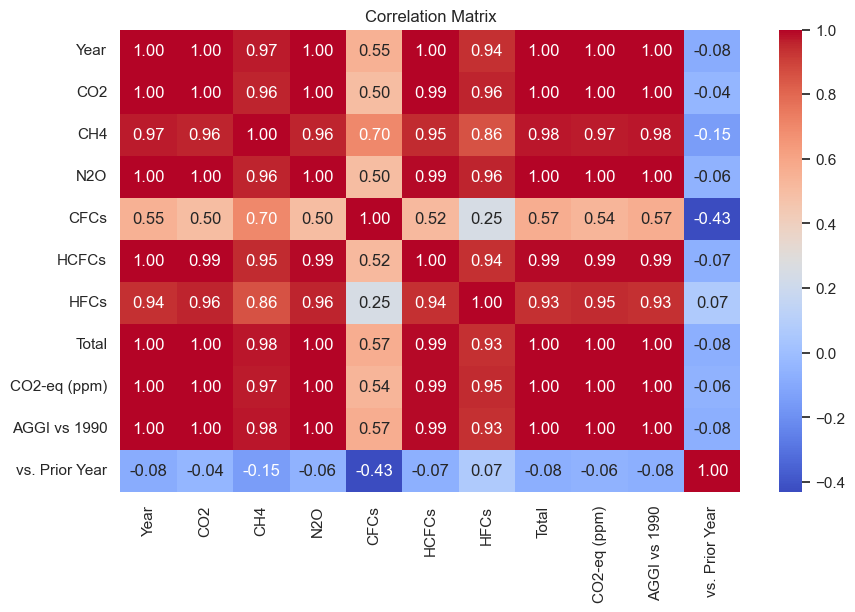

In [8]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

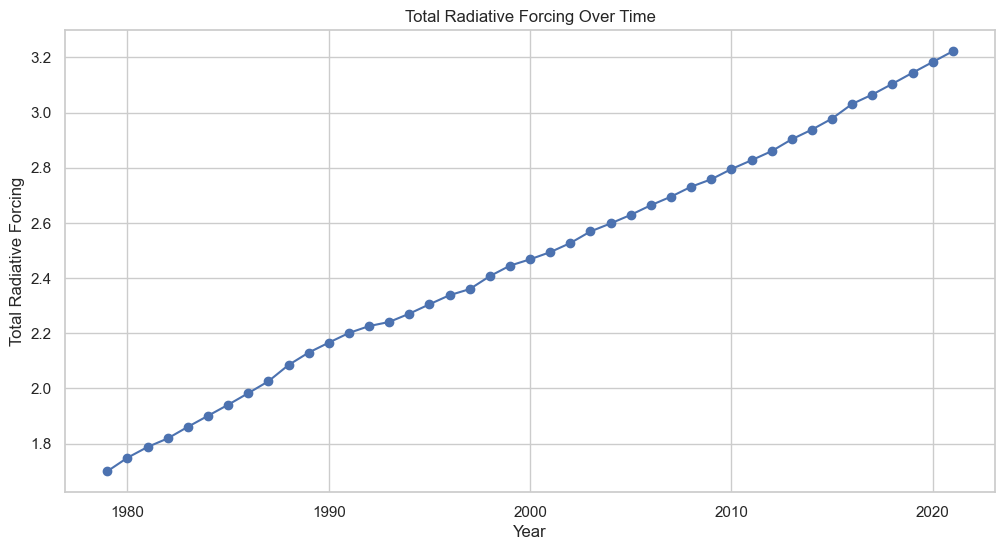

In [9]:
# 4. Time Series Plot of Total Radiative Forcing
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Total'], marker='o')
plt.title("Total Radiative Forcing Over Time")
plt.xlabel("Year")
plt.ylabel("Total Radiative Forcing")
plt.grid(True)
plt.show()

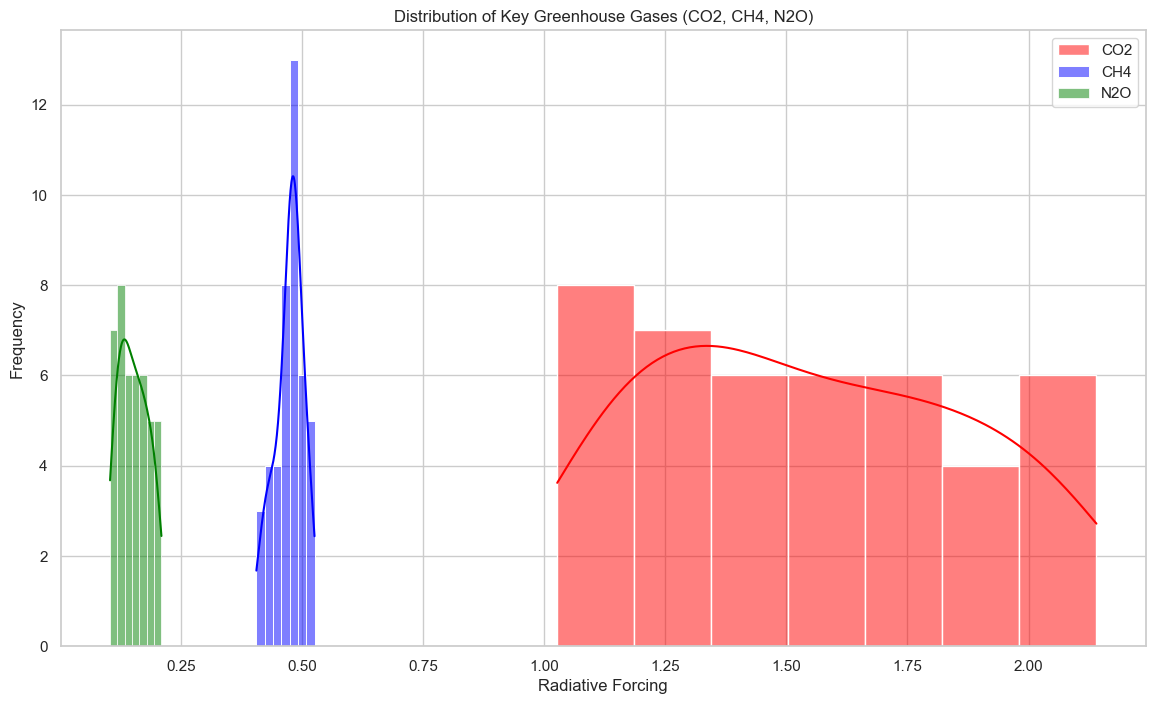

In [10]:
# 5. Distribution of Key GHGs
plt.figure(figsize=(14, 8))
sns.histplot(df['CO2'], kde=True, color='red', label='CO2')
sns.histplot(df['CH4'], kde=True, color='blue', label='CH4')
sns.histplot(df['N2O'], kde=True, color='green', label='N2O')
plt.title("Distribution of Key Greenhouse Gases (CO2, CH4, N2O)")
plt.xlabel("Radiative Forcing")
plt.ylabel("Frequency")
plt.legend()
plt.show()

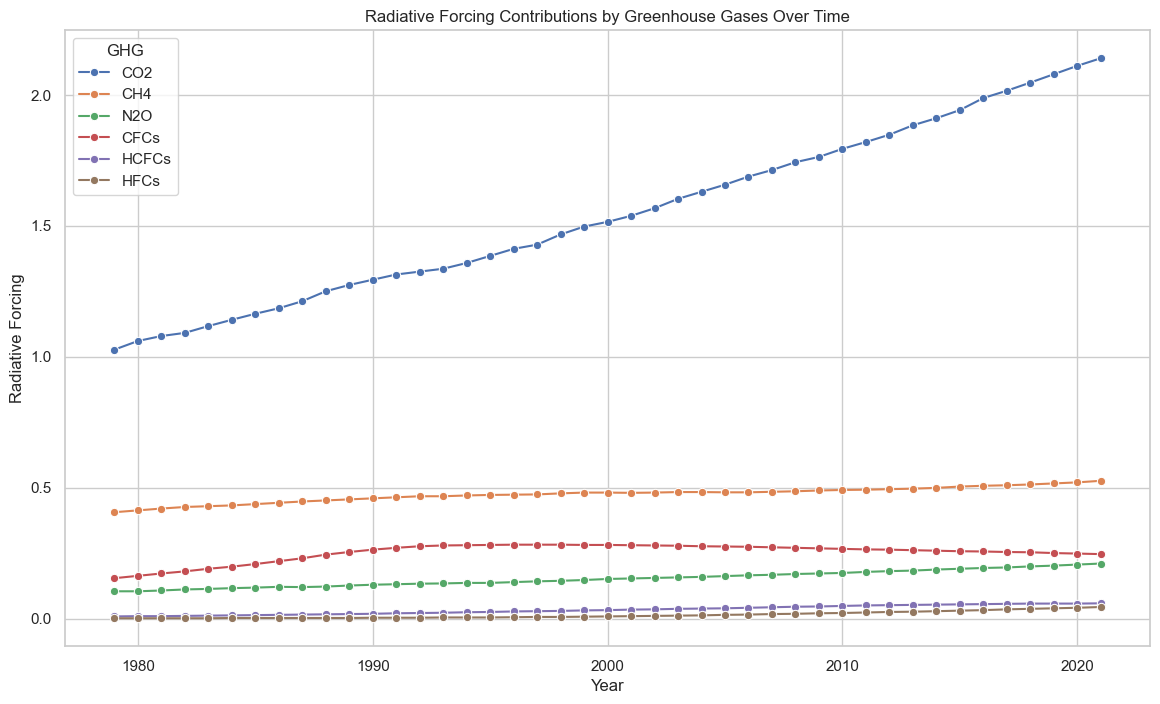

In [11]:

# 6. Radiative Forcing Contributions by GHGs Over Time
ghg_columns = ['CO2', 'CH4', 'N2O', 'CFCs', 'HCFCs', 'HFCs']
df_melted = df.melt(id_vars=['Year'], value_vars=ghg_columns, var_name='GHG', value_name='Radiative Forcing')

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, x='Year', y='Radiative Forcing', hue='GHG', marker="o")
plt.title("Radiative Forcing Contributions by Greenhouse Gases Over Time")
plt.xlabel("Year")
plt.ylabel("Radiative Forcing")
plt.grid(True)
plt.show()

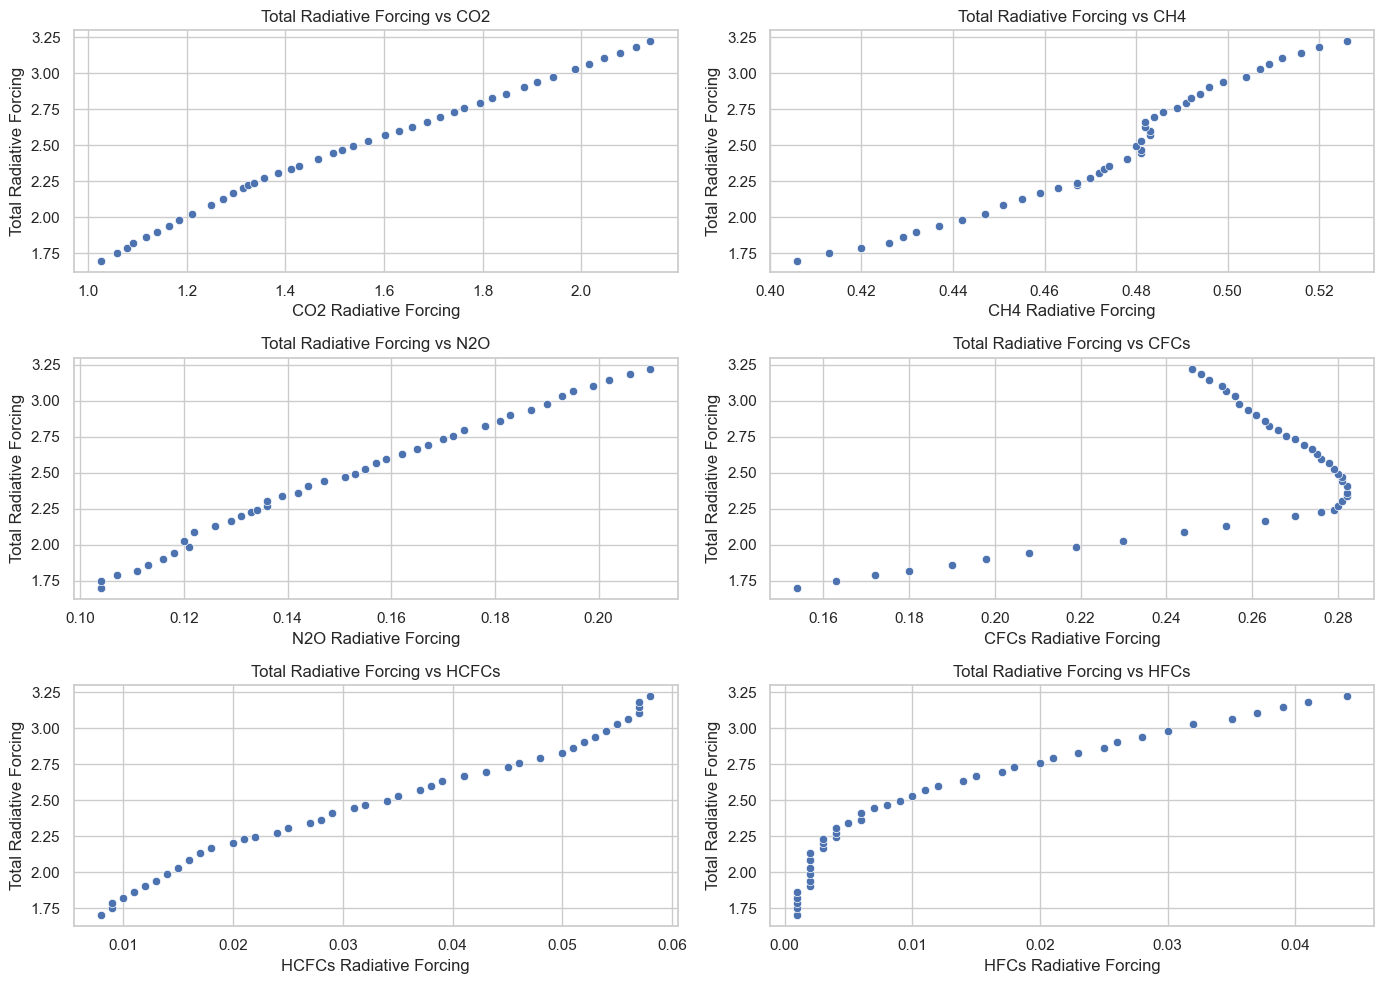

In [12]:
# 7. Scatter Plots to Show Relationship Between Total Radiative Forcing and Individual GHGs
plt.figure(figsize=(14, 10))
for i, column in enumerate(ghg_columns):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data=df, x=column, y='Total')
    plt.title(f'Total Radiative Forcing vs {column}')
    plt.xlabel(f'{column} Radiative Forcing')
    plt.ylabel('Total Radiative Forcing')
    plt.grid(True)

plt.tight_layout()
plt.show()


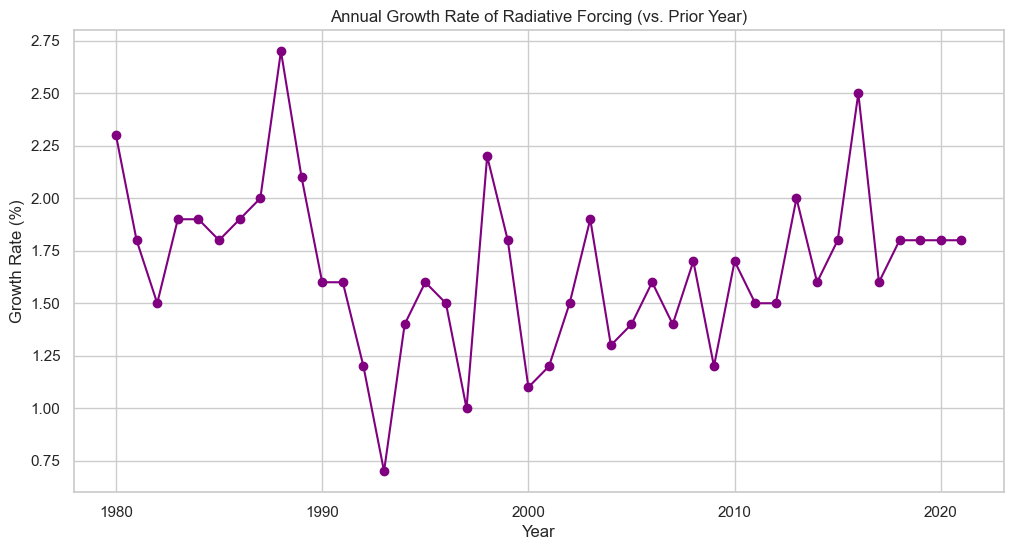

In [13]:
# 8. Annual Growth Rate (vs. Prior Year)
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['vs. Prior Year'], marker='o', linestyle='-', color='purple')
plt.title("Annual Growth Rate of Radiative Forcing (vs. Prior Year)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.show()

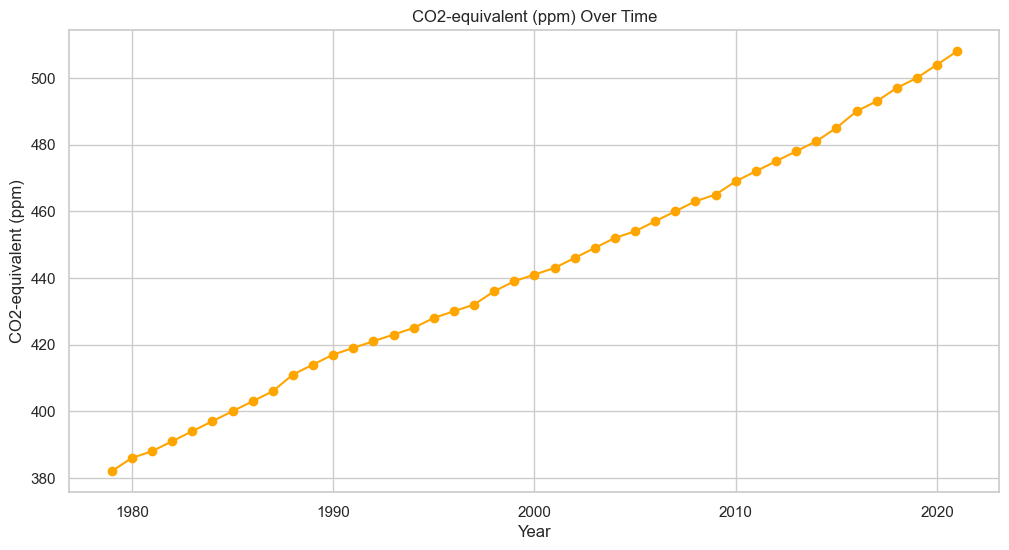

In [14]:
# 9. CO2-equivalent (ppm) Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['CO2-eq (ppm)'], marker='o', linestyle='-', color='orange')
plt.title("CO2-equivalent (ppm) Over Time")
plt.xlabel("Year")
plt.ylabel("CO2-equivalent (ppm)")
plt.grid(True)
plt.show()

C:\Users\jasmi\AppData\Local\Temp\ipykernel_32284\3525936378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='GHG', y='Radiative Forcing', palette="Set2")


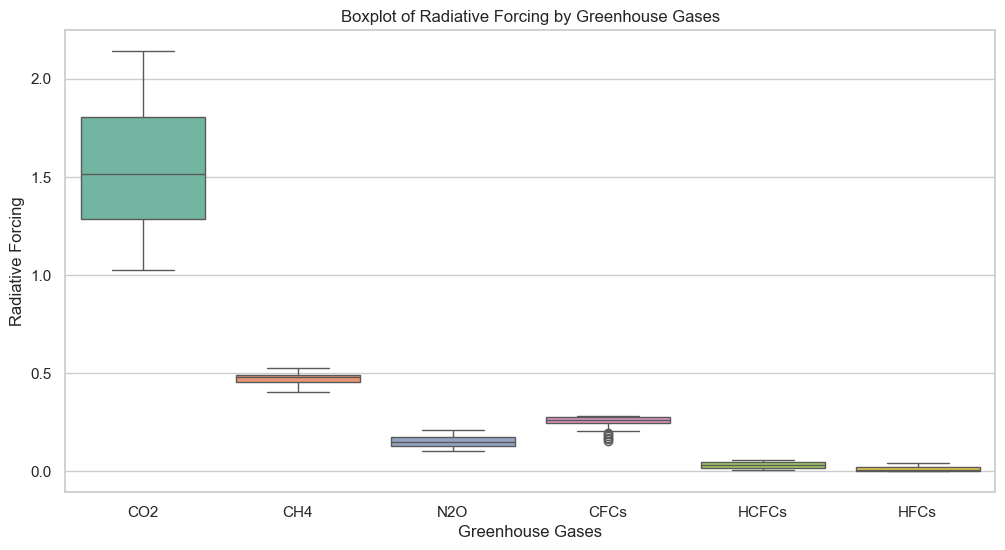

In [15]:

# 10. Boxplot of Radiative Forcing by GHGs
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='GHG', y='Radiative Forcing', palette="Set2")
plt.title("Boxplot of Radiative Forcing by Greenhouse Gases")
plt.xlabel("Greenhouse Gases")
plt.ylabel("Radiative Forcing")
plt.show()